# Oral-B Case

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from efficient_apriori import apriori # pip install efficient-apriori

df = pd.read_csv('Case Data.csv', sep=",")

## Задание 1 -  Проверка данных на полноту

In [2]:
df.head()

,﻿id чека,Дата и время,ИНН,IDПользователя,Товар,Бренд,Теги,Цена,Кол-во,Сумма,Кэшбэк
0,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,libresse natural care ultra прокладки normal 10ш,libresse,личная гигиена; красота и здоровье; прокладки,63.2,2.0,126.4,NaN
1,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,pampers трусики-подг 5 junior 12-17/15-18кг 96шт,pampers,NaN,1549.0,1.0,1549.0,154.9
2,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,salton губка/гл кож с дозатор(чер)(шанхай продак,NaN,NaN,135.2,1.0,135.2,NaN
3,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,soft ватные палочки 200шт пластиковый стакан(кот,NaN,NaN,31.2,1.0,31.2,NaN
4,0000a622f9c8f1821ca549fbcfd47405,21.12.2019 15:15,2310031475,2700449a73d4cb9d8e909c706bf16fbe,моя цена/степной тюльпан туал/бум без вт(бумагар,NaN,NaN,4.9,1.0,4.9,NaN


In [3]:
# count NaNs
nans = pd.DataFrame(df.isna().sum())
# count percentage of nans in columns
nans['percentage'] = round(nans[0] / len(df) * 100, 1)

print(nans)

print('Количество строк, содержащих NaN:', df.isna().any(axis=1).sum()) # подсчет общего количества строк, содержащих NaN

r, c = df.shape
share = ((df.isna().any(axis=1).sum())/r)*100
print('Доля строк, содержащих NaN-значения, %:', "%0.3f" % share)

                     0  percentage
﻿id чека             0         0.0
Дата и время         0         0.0
ИНН                  0         0.0
IDПользователя       0         0.0
Товар                0         0.0
Бренд           178495        57.6
Теги            128391        41.5
Цена                52         0.0
Кол-во              52         0.0
Сумма               52         0.0
Кэшбэк          253552        81.9
Количество строк, содержащих NaN: 259220
Доля строк, содержащих NaN-значения, %: 83.698


Пропущенные занчения есть в 6 столбцах из 11. Наибольшее количество пропусков - в столбце Кэшбэк (253552, 81.9%). Также много пропусков в столбцах Бренд (178495, 57.6%) и Тэги (128391, 41.5%).

## Задание 2 - Поиск ассоциативных правил

In [4]:
# Заполняем NaN-значения
cols = ['Теги', 'Цена', 'Кол-во', 'Сумма', 'Кэшбэк'] # exclude brand-name
df[cols] = df[cols].fillna(df.mode().iloc[0])
# Группируем
unique_checks = df.groupby('﻿id чека')["Теги"].unique()
group_goods = list(map(tuple, unique_checks))

association_rules = apriori(group_goods, min_support=0.007, min_confidence=0.5) #0.0045(0.0035)

association_results = list(association_rules)

print(association_rules[1]) # печатаем сами правила
print('-'*20)
print(association_rules[0])
print('-'*20)
print(len(association_rules))
print('-'*20)

for item in association_rules:
    pair = item[1]
    print(pair)
    print()

[{личная гигиена; красота и здоровье; прокладки} -> {упаковка; пакеты; прочее}, {прокладки; личная гигиена; красота и здоровье} -> {упаковка; пакеты; прочее}, {красота и здоровье; гигиена волос; шампунь для волос} -> {упаковка; пакеты; прочее}, {красота и здоровье; дезодорант/антиперсперант; личная гигиена} -> {упаковка; пакеты; прочее}, {продукты; банан; фрукты; овощи/фрукты/ягоды} -> {упаковка; пакеты; прочее}, {бакалея; сахар; продукты} -> {упаковка; пакеты; прочее}, {красота и здоровье; прокладки; личная гигиена} -> {упаковка; пакеты; прочее}, {красота и здоровье; личная гигиена; прокладки} -> {упаковка; пакеты; прочее}, {уход за полостью рта; красота и здоровье; зубная паста} -> {упаковка; пакеты; прочее}, {дезодорант/антиперсперант; личная гигиена; красота и здоровье} -> {упаковка; пакеты; прочее}, {красота и здоровье; шампунь для волос; гигиена волос} -> {упаковка; пакеты; прочее}, {хлеб и сладости; хлеб; продукты} -> {упаковка; пакеты; прочее}, {уход за полостью рта; зубная пас

Довольно часто повторяются различные комбинация {упаковка; пакеты; прочее}. Возможно, следует поработать над тем, чтобы исключить из анализа такие комбинации категорий.

## Задание 3 - Найти товары P&G в чеках покупателей

In [5]:
def count_brand(dataset, brand_name, parser):
    found_rows = df['Бренд'].str.contains(parser).sum()
    print(brand_name + ":", "%0.0f" % df['Бренд'].str.contains(parser).sum())
    return found_rows

<AxesSubplot:title={'center':'P&G Top-3 Brands'}, ylabel='Brand Name'>

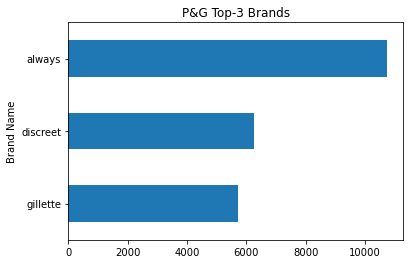

In [6]:
df['Бренд'] = df['Бренд'].str.lower()

# pandas has easy-to-use method
top_brands = df['Бренд'].value_counts()[0:3].sort_values()

# plot top brands
top_brands.plot(kind='barh',
    title='P&G Top-3 Brands',
    ylabel='sales count',
    xlabel='Brand Name'
)

Pampers: 3505
Ariel: 2523
Tide: 1960
Миф: 265
Lenor: 5207
Always: 10737
Tampax: 228
Naturella: 2985
Discreet: 6244
Braun: 3
Venus: 1122
Head&Shoulders: 3658
Pantene: 3848
Herbal Essences: 147
Aussie: 356
Bear Fruits: 0
Fairy: 4266
Mr.Proper: 1936
Oral-B: 1106
Blend-a-Med: 1764
Clearblue: 64
Gillette: 5718
Old Spice: 2315
Safeguard: 1014


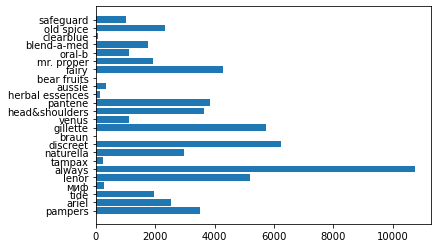

In [7]:
# using count_brand function

pampers = count_brand(df, "Pampers", "pampers")
ariel = count_brand(df, "Ariel", "ariel")
tide = count_brand(df, "Tide", "tide")
миф = count_brand(df, "Миф", "миф")
lenor = count_brand(df, "Lenor", "lenor")
always = count_brand(df, "Always", "always")
tampax = count_brand(df, "Tampax", "tampax")
naturella = count_brand(df, "Naturella", "naturella")
discreet = count_brand(df, "Discreet", "discreet")
braun = count_brand(df, "Braun", "braun")
venus = count_brand(df, "Venus", "venus")
head_shoulders = count_brand(df, "Head&Shoulders", "head & shoulders|head&shoulders")
pantene = count_brand(df, "Pantene", "pantene")
herbal_essences = count_brand(df, "Herbal Essences", "herbal essences|herbal")
aussie = count_brand(df, "Aussie", "aussie")
bear_fruits = count_brand(df, "Bear Fruits", "bear fruits")
fairy = count_brand(df, "Fairy", "fairy")
mr_proper = count_brand(df, "Mr.Proper", "mr. proper|mr.proper")
oral_b = count_brand(df, "Oral-B", "oral b|oral-b")
blend_a_med = count_brand(df, "Blend-a-Med", "blend-a-med")
clearblue = count_brand(df, "Clearblue", "clearblue")
gillette = count_brand(df, "Gillette", "gillette")
old_spice = count_brand(df, "Old Spice", "old spice")
safeguard = count_brand(df, "Safeguard", "safeguard")

# График
columns = [pampers, ariel, tide, миф, lenor, always, tampax, naturella,
           discreet, braun, gillette, venus, head_shoulders, pantene, herbal_essences, aussie,
           bear_fruits, fairy, mr_proper, oral_b, blend_a_med, clearblue, old_spice, safeguard]
labels = ('pampers', 'ariel', 'tide', 'миф', 'lenor', 'always', 'tampax', 'naturella',
          'discreet', 'braun', 'gillette', 'venus', 'head&shoulders', 'pantene', 'herbal essences', 'aussie',
          'bear fruits', 'fairy', 'mr. proper', 'oral-b', 'blend-a-med', 'clearblue', 'old spice', 'safeguard')
plt.barh(labels, columns)
plt.show()

Все 3 бренда (Always, Discreet, Gillette) - бренды P&G (https://www.procterandgamble.ru/brendy-i-produktsiya/).

Именно эти три бренда наиболее часто встречаются в чеках покупателей.